****This Jupyter notebook describes the process of the process of making the synthesized dataset for the experiments****

The satellite imageries are collected from: https://github.com/phelber/EuroSAT

In [18]:
import os
import sys
import numpy as np
import pickle
import random
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import stats
from scipy.integrate import odeint

#### Processing imageris

In [2]:
width = 64
height = 64
num_bands = 9
processed_img_dir = 'data/EuroSAT_MS_processed/'

if not os.path.exists(processed_img_dir):
    os.makedirs(processed_img_dir)
    print(f"Directory {processed_img_dir} created.")
else:
    print(f"Directory {processed_img_dir} already exists.")

land_use_cat = os.listdir('data/EuroSAT_RGB/')
land_use_cat

Directory data/EuroSAT_MS_processed/ already exists.


['Highway',
 'Forest',
 'Pasture',
 'River',
 'Industrial',
 'AnnualCrop',
 'PermanentCrop',
 'Residential',
 'HerbaceousVegetation',
 'SeaLake']

In [6]:
for cat in land_use_cat:
    print(f'processing {cat} imageries')

    processed_img_cat_dir = os.path.join(processed_img_dir, cat)

    if not os.path.exists(processed_img_cat_dir):
        os.makedirs(processed_img_cat_dir)
        print(f"Directory {processed_img_cat_dir} created.")
    else:
        print(f"Directory {processed_img_cat_dir} already exists.")

    # Define directories
    ms_dataset_path = os.path.join('data/EuroSAT_MS/', cat)
    rgb_dataset_path = os.path.join('data/EuroSAT_RGB/', cat)

    for f in os.listdir(ms_dataset_path):
        f_name = f.split('.')[0]
        f_name
        
        ms_img_path = ms_dataset_path + '/' + f_name + '.tif'
        rgb_img_path = rgb_dataset_path + '/' + f_name + '.jpg'
        
        # tci bands
        rgb_img = plt.imread(rgb_img_path)
        rgb_img = rgb_img.astype(np.float32) / 255
        
        # other bands
        ms_img = rasterio.open(ms_img_path).read() if rasterio.open(ms_img_path) else None
        ms_img = np.clip(ms_img[[4, 5, 6, 7, 11, 12], :, :]//32, 0, 255)
        # Band 5, 6, 7, 8, 11, 12
        ms_img = ms_img.astype(np.float32) / 255
        
        # combined bands
        img = np.concatenate((rgb_img.transpose(2, 0, 1), ms_img), axis=0)
        
        file_path = os.path.join(processed_img_cat_dir, f)
        
        with rasterio.open(
            file_path,
            'w',
            driver='GTiff',
            height=height,
            width=width,
            count=num_bands,
            dtype=img.dtype
        ) as dst:
            for band in range(num_bands):
                dst.write(img[band], band + 1)

processing SeaLake imageries
Directory data/EuroSAT_MS_processed/SeaLake already exists.


/home/clu/anaconda3/envs/satimg/lib/python3.9/site-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


processing River imageries
Directory data/EuroSAT_MS_processed/River created.
processing Industrial imageries
Directory data/EuroSAT_MS_processed/Industrial created.
processing Pasture imageries
Directory data/EuroSAT_MS_processed/Pasture created.
processing AnnualCrop imageries
Directory data/EuroSAT_MS_processed/AnnualCrop created.
processing HerbaceousVegetation imageries
Directory data/EuroSAT_MS_processed/HerbaceousVegetation created.
processing Highway imageries
Directory data/EuroSAT_MS_processed/Highway created.
processing PermanentCrop imageries
Directory data/EuroSAT_MS_processed/PermanentCrop created.
processing Residential imageries
Directory data/EuroSAT_MS_processed/Residential created.
processing Forest imageries
Directory data/EuroSAT_MS_processed/Forest created.


##### Check one example

/home/clu/anaconda3/envs/satimg/lib/python3.10/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


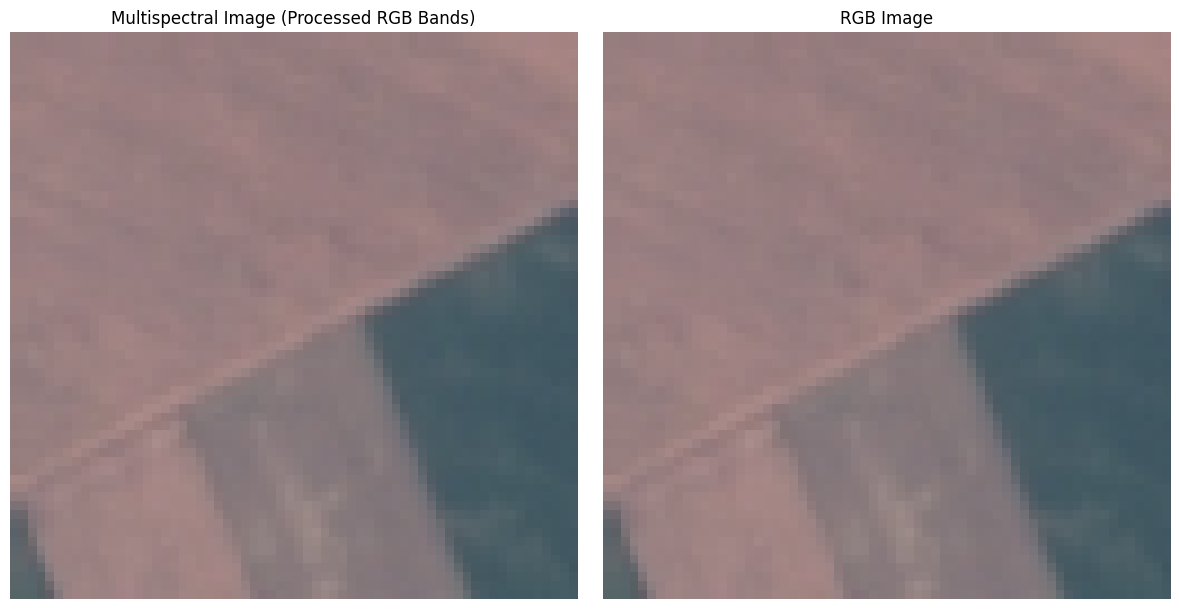

In [3]:
ms_dir = "data/EuroSAT_MS_processed/AnnualCrop/"
rgb_dir = "data/EuroSAT_RGB/AnnualCrop/"

# Get the first file in each directory
ms_image_path = os.path.join(ms_dir, sorted(os.listdir(ms_dir))[10])
rgb_image_path = os.path.join(rgb_dir, sorted(os.listdir(rgb_dir))[10])

# Load and display the multispectral (MS) image
with rasterio.open(ms_image_path) as ms_image:
    ms_data = ms_image.read([1, 2, 3])  # Assuming RGB bands are 3, 2, and 1 for visualization
    ms_extent = (ms_image.bounds.left, ms_image.bounds.right, ms_image.bounds.bottom, ms_image.bounds.top)

# Load and display the RGB image
rgb_image = Image.open(rgb_image_path)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Multispectral image
axs[0].imshow(ms_data.transpose(1, 2, 0))  # Rasterio loads in (bands, rows, cols), so transpose
axs[0].set_title("Multispectral Image (Processed RGB Bands)")
axs[0].axis("off")

# RGB image
axs[1].imshow(rgb_image)
axs[1].set_title("RGB Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()

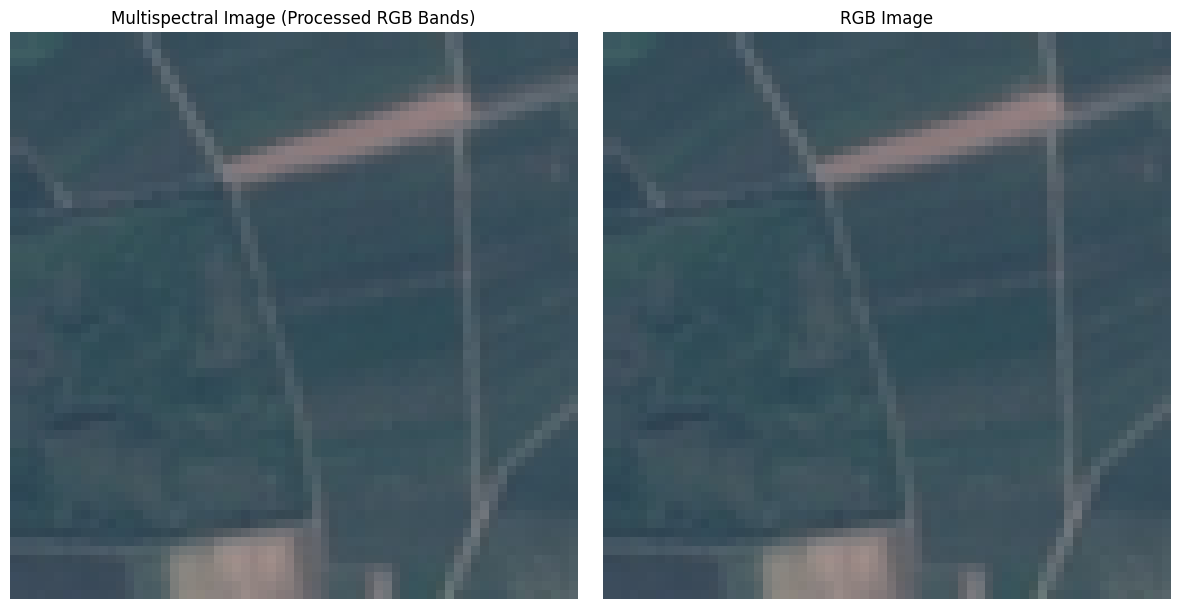

In [4]:
ms_dir = "data/EuroSAT_MS_processed/PermanentCrop/"
rgb_dir = "data/EuroSAT_RGB/PermanentCrop/"

# Get the first file in each directory
ms_image_path = os.path.join(ms_dir, sorted(os.listdir(ms_dir))[10])
rgb_image_path = os.path.join(rgb_dir, sorted(os.listdir(rgb_dir))[10])

# Load and display the multispectral (MS) image
with rasterio.open(ms_image_path) as ms_image:
    ms_data = ms_image.read([1, 2, 3])  # Assuming RGB bands are 3, 2, and 1 for visualization
    ms_extent = (ms_image.bounds.left, ms_image.bounds.right, ms_image.bounds.bottom, ms_image.bounds.top)

# Load and display the RGB image
rgb_image = Image.open(rgb_image_path)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Multispectral image
axs[0].imshow(ms_data.transpose(1, 2, 0))  # Rasterio loads in (bands, rows, cols), so transpose
axs[0].set_title("Multispectral Image (Processed RGB Bands)")
axs[0].axis("off")

# RGB image
axs[1].imshow(rgb_image)
axs[1].set_title("RGB Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()

### Generate Category dependent covaraite

In [3]:
def cov_generator(cat):
    if cat == 'PermanentCrop':
        return [np.random.beta(6, 4, 1)[0],  # Medium livestock density
                np.random.beta(9, 2, 1)[0],  # High human activity
                np.random.beta(7, 3, 1)[0],  # High temperature resilience (irrigation/management)
                np.random.beta(7, 3, 1)[0],  # Low seasonal variability (managed environment)
                np.random.beta(5, 5, 1)[0],  # Medium waste accumulation
                np.random.beta(2, 8, 1)[0],  # Low predator presence (more mosquitoes)
                np.random.beta(8, 2, 1)[0],  # High artificial light at night (ALAN)
        ]
    elif cat == 'AnnualCrop':
        return [np.random.beta(7, 3, 1)[0],  # High livestock density
                np.random.beta(8, 2, 1)[0],  # High human activity
                np.random.beta(4, 6, 1)[0],  # Medium-high temperature resilience
                np.random.beta(9, 1, 1)[0],  # High seasonal variability (managed environment)
                np.random.beta(6, 4, 1)[0],  # Medium-high waste accumulation
                np.random.beta(3, 7, 1)[0],  # Low-medium predator presence
                np.random.beta(7, 3, 1)[0],  # Medium-high artificial light at night (ALAN)
        ]
    elif cat == 'Pasture':
        return [np.random.beta(9, 1, 1)[0],  # Very high livestock density
                np.random.beta(8, 2, 1)[0],  # Medium human activity
                np.random.beta(4, 6, 1)[0],  # Medium temperature resilience
                np.random.beta(9, 1, 1)[0],  # Medium seasonal variability
                np.random.beta(4, 6, 1)[0],  # Low-medium waste accumulation
                np.random.beta(6, 4, 1)[0],  # Medium-high predator presence (fewer mosquitoes)
                np.random.beta(3, 7, 1)[0],  # Low artificial light at night (ALAN)
        ]
    elif cat == 'HerbaceousVegetation':
        return [np.random.beta(4, 6, 1)[0],  # Medium-low livestock density
                np.random.beta(3, 7, 1)[0],  # Low human activity
                np.random.beta(4, 6, 1)[0],  # Low-medium temperature resilience
                np.random.beta(7, 3, 1)[0],  # Medium-high variability
                np.random.beta(3, 7, 1)[0],  # Low waste accumulation
                np.random.beta(7, 3, 1)[0],  # High predator presence (fewer mosquitoes)
                np.random.beta(2, 8, 1)[0],  # Very low artificial light at night (ALAN)
        ]
    elif cat == 'Forest':
        return [np.random.beta(1, 9, 1)[0],  # Very low livestock density
                np.random.beta(1, 9, 1)[0],  # Very low human activity
                np.random.beta(8, 2, 1)[0],  # High temperature resilience
                np.random.beta(2, 8, 1)[0],  # Low seasonal variability
                np.random.beta(2, 8, 1)[0],  # Very low waste accumulation
                np.random.beta(9, 1, 1)[0],  # Very high predator presence (fewest mosquitoes)
                np.random.beta(1, 9, 1)[0],  # Very low artificial light at night (ALAN)
        ]

## Simulation model with image covariates and environmental factors (NDVI, NDMI, MDRE, MSI)

The differential equation governing the mosquito population \( P(t) \) is given by:

$p \sim Poisson(\lambda)$

$\lambda = \exp \left(\beta_0  + \beta_1^{\top} \boldsymbol{x} + \beta_2^{\top} \boldsymbol{z} +  \epsilon \right)$

Where:
- $P$ is the mosquito population.
- $x$ represents image covariates.
- $z$ represents pixel-leveled indecies including NDVI, NVMI, NDRE, MSI.
- $\beta_0$ is the intercept
- $\beta_1, \beta_2$  are coefficients.



In [4]:
def mosquito_gen(x, z, beta_1, beta_2, beat_0 = -100):
    
    env_eff = np.random.normal(scale = 0.01, size = z.shape[1:])
    for j in range(len(beta_2)):
        env_eff += z[j, :, :] * beta_2[j]
    
    lambda_loc = np.exp(beat_0 + np.sum(x * beta_1) +  env_eff ).astype(np.float32)
    p_loc = np.random.poisson(lambda_loc)
    return p_loc

In [7]:
## generate covariates
i = 50

cat = 'PermanentCrop'
f_img_dir = 'data/EuroSAT_MS_processed/' + 'PermanentCrop/'

## read factual img
f_img_path = os.path.join(f_img_dir, os.listdir(f_img_dir)[i])
with rasterio.open(f_img_path) as src:
    img = src.read()  # Read all bands
    profile = src.profile  # Metadata of the image

green = img[1]  # Band 4 (index 3, zero-based indexing)
red = img[0]  # Band 4 (index 3, zero-based indexing)
nir = img[6]  # Band 8 (index 7, zero-based indexing)
swir = img[8]  # Band 11 (index 12, zero-based indexing)
red_edge = img[3]  # Band 5 (Red Edge) 


# Compute NDVI (NDVI = (NIR - Red) / (NIR + Red))
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red + 1e-10)
print(f'NVDI:{ndvi.mean()}  ({ndvi.std()})')

# Compute NDMI (NDVI = (NIR_A - SWIR) / (NIR_A + SWIR))
ndmi = (nir.astype(float) - swir.astype(float)) / (nir + swir + 1e-10)
print(f'NDMI:{ndmi.mean()} ({ndmi.std()})')

# Compute NDRE (Red Edge Vegetation Index)
ndre = (nir.astype(float) - red_edge.astype(float)) / (nir + red_edge + 1e-10)
print(f'NDRE: {ndre.mean()} ({ndre.std()})')

# Compute MSI (Moisture Stress Index)
msi = swir.astype(float) / (nir + 1e-10)
print(f'MSI: {msi.mean()} ({msi.std()})')

z = np.array([ndvi, ndmi, ndre, msi])

# Generate covariates
covs = cov_generator(cat)

beta_1 = np.random.normal(size = 7)
beta_2 = np.random.normal(size = 4)

mosquito_pop = mosquito_gen(covs, z, beta_1, beta_2, beat_0 = -1)

print(f'Mosquito population: {mosquito_pop.sum()}')

NVDI:-0.1404591077852959  (0.18294483487867294)
NDMI:-0.04497804223715017 (0.0271384306803407)
NDRE: 0.2562840720697161 (0.10129483609004315)
MSI: 1.0958908159327474 (0.059885658755240115)
Mosquito population: 1275


## Plot the example

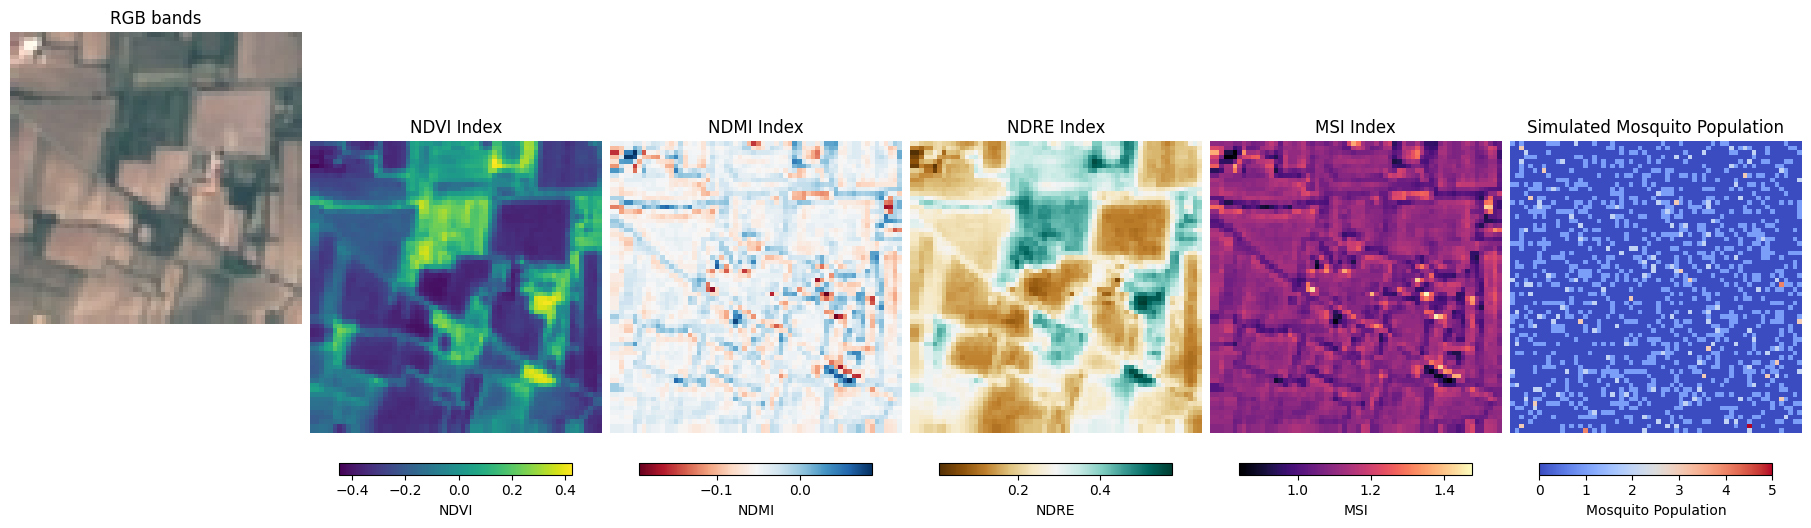

In [8]:
# Set up the figure with 3 subplots
import seaborn as sns
from scipy.interpolate import interp2d

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 6 subplots
fig, axes = plt.subplots(1, 6, figsize=(18, 6), constrained_layout=True)

# Function to add an image and horizontal colorbar below
def plot_with_colorbar(ax, data, cmap, title, label):
    im = ax.imshow(data, cmap=cmap, origin='lower')
    ax.set_title(title)
    ax.axis("off")
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.8, pad=0.05)  # Shrink keeps it aligned
    cbar.set_label(label)

# Plot RGB bands
axes[0].imshow(np.flipud(img[[0, 1, 2], :, :].transpose(1, 2, 0)))
axes[0].set_title("RGB bands")
axes[0].axis("off")  # No colorbar for RGB

# Plot indices with colorbars below
plot_with_colorbar(axes[1], ndvi, 'viridis', 'NDVI Index', 'NDVI')   # NDVI → Viridis
plot_with_colorbar(axes[2], ndmi, 'RdBu', 'NDMI Index', 'NDMI')      # NDMI → Red to Blue
plot_with_colorbar(axes[3], ndre, 'BrBG', 'NDRE Index', 'NDRE')      # NDRE → Brown to Green
plot_with_colorbar(axes[4], msi, 'magma', 'MSI Index', 'MSI')        # MSI → Magma
plot_with_colorbar(axes[5], mosquito_pop, 'coolwarm', 'Simulated Mosquito Population', 'Mosquito Population')  # Population → Coolwarm

# Show the final plot
plt.show()



## Simulate the experiment data!

In [5]:
random.seed(8787)
np.random.seed(8787)

# sample parameters
beta_1 = np.random.normal(size = 7)
beta_2 = np.random.normal(size = 4)

In [8]:
categories = ['Pasture', 'AnnualCrop', 'PermanentCrop', 'HerbaceousVegetation', 'Forest']
simulated_meta = []

for cat in categories:
    if cat == 'Pasture':
        samples = 100
    elif cat == 'AnnualCrop':
        samples = 400
    elif cat == 'PermanentCrop':
        samples = 150
    elif cat == 'Residential':
        samples = 200
    elif cat == 'HerbaceousVegetation':
        samples = 150
    
    f_img_dir = 'data/EuroSAT_MS_processed/' + cat
    shuffled_indices = np.random.permutation(samples)
    for i in range(samples):
        # Generate covariates
        covs = cov_generator(cat)
    
        ## read factual img
        f_i = shuffled_indices[:samples][i]
        
        f_img_path = os.path.join(f_img_dir, os.listdir(f_img_dir)[f_i])
        with rasterio.open(f_img_path) as src:
            img = src.read()  # Read all bands
            profile = src.profile  # Metadata of the image
        
        green = img[1]     # Band 4 (index 3, zero-based indexing)
        red = img[0]       # Band 4 (index 3, zero-based indexing)
        nir = img[6]       # Band 8 (index 7, zero-based indexing)
        swir = img[8]      # Band 11 (index 12, zero-based indexing)
        red_edge = img[3]  # Band 5 (Red Edge) 
        
        # Compute NDVI (NDVI = (NIR - Red) / (NIR + Red))
        ndvi = (nir.astype(float) - red.astype(float)) / (nir + red + 1e-10)
        
        # Compute NDMI (NDVI = (NIR_A - SWIR) / (NIR_A + SWIR))
        ndmi = (nir.astype(float) - swir.astype(float)) / (nir + swir + 1e-10)

        # Compute NDRE (Red Edge Vegetation Index)
        ndre = (nir.astype(float) - red_edge.astype(float)) / (nir + red_edge + 1e-10)
        
        # Compute MSI (Moisture Stress Index)
        msi = swir.astype(float) / (nir + 1e-10)

        z = np.array([ndvi, ndmi, ndre, msi])

        f_mosquito_pop = mosquito_gen(covs, z, beta_1, beta_2, beat_0 = -1)
        P = f_mosquito_pop.sum()
    
        ## read counterfactual img
        c_cat = np.random.choice(categories)
        cf_img_dir = 'data/EuroSAT_MS_processed/' + c_cat
        cf_img_path = os.path.join(cf_img_dir, np.random.choice(os.listdir(cf_img_dir)))

        with rasterio.open(cf_img_path) as src:
            cf_img = src.read()  # Read all bands
            profile = src.profile  # Metadata of the image
        
        cf_green = cf_img[1]     # Band 4 (index 3, zero-based indexing)
        cf_red = cf_img[0]       # Band 4 (index 3, zero-based indexing)
        cf_nir = cf_img[6]       # Band 8 (index 7, zero-based indexing)
        cf_swir = cf_img[8]      # Band 11 (index 12, zero-based indexing)
        cf_red_edge = cf_img[3]  # Band 5 (Red Edge) 
        
        # Compute NDVI (NDVI = (NIR - Red) / (NIR + Red))
        cf_ndvi = (cf_nir.astype(float) - cf_red.astype(float)) / (cf_nir + cf_red + 1e-10)
        
        # Compute NDMI (NDVI = (NIR_A - SWIR) / (NIR_A + SWIR))
        cf_ndmi = (cf_nir.astype(float) - cf_swir.astype(float)) / (cf_nir + cf_swir + 1e-10)

        # Compute NDRE (Red Edge Vegetation Index)
        cf_ndre = (cf_nir.astype(float) - cf_red_edge.astype(float)) / (cf_nir + cf_red_edge + 1e-10)
        
        # Compute MSI (Moisture Stress Index)
        cf_msi = cf_swir.astype(float) / (cf_nir + 1e-10)
    
        cf_mosquito_pop = mosquito_gen(covs, z, beta_1, beta_2, beat_0 = -1)
        P_cf = cf_mosquito_pop.sum()
        
        data = {'covs': covs,
                'f_img_path': f_img_path,
                'ndvi': ndvi,
                'ndmi': ndmi,
                'ndre': ndre,
                'msi': msi,
                'f_mosquito_pop': f_mosquito_pop,
                'P': P, 
                'cf_img_path': cf_img_path,
                'cf_ndvi': cf_ndvi,
                'cf_ndmi': cf_ndmi,
                'cf_ndre': cf_ndre,
                'cf_msi': cf_msi, 
                'cf_mosquito_pop':cf_mosquito_pop,
                'P_cf': P_cf}
    
        simulated_meta.append(data)
    
        if len(simulated_meta) % 50 == 0:
            print(f"{len(simulated_meta)} / 1000 finished")

50 / 1000 finished
100 / 1000 finished
150 / 1000 finished
200 / 1000 finished
250 / 1000 finished
300 / 1000 finished
350 / 1000 finished
400 / 1000 finished
450 / 1000 finished
500 / 1000 finished
550 / 1000 finished
600 / 1000 finished
650 / 1000 finished
700 / 1000 finished
750 / 1000 finished
800 / 1000 finished
850 / 1000 finished
900 / 1000 finished
950 / 1000 finished


## Plot more examples (Factual)

data/EuroSAT_MS_processed/Pasture/Pasture_389.tif


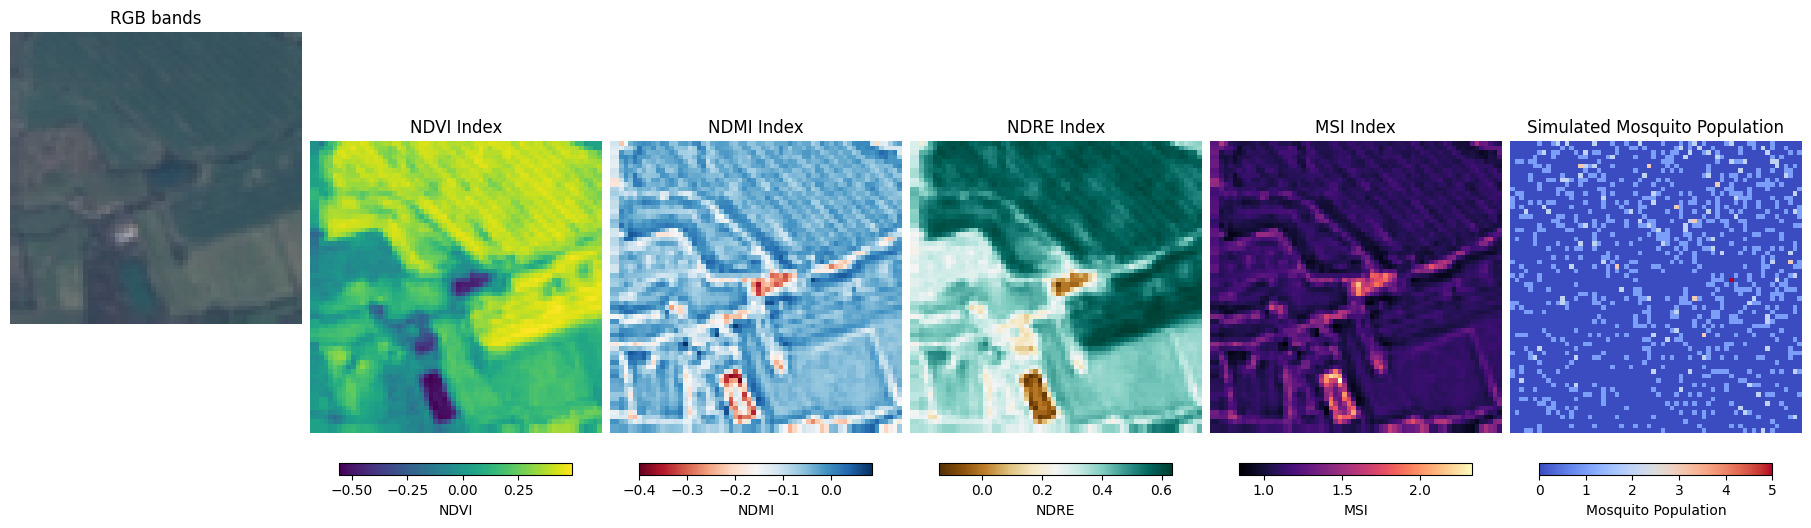

In [15]:
i = 10
f_img_path = simulated_meta[i]['f_img_path']
ndvi = simulated_meta[i]['ndvi']
ndmi = simulated_meta[i]['ndmi']
ndre = simulated_meta[i]['ndre']
msi = simulated_meta[i]['msi']
mosquito_pop = simulated_meta[i]['f_mosquito_pop']

print(f_img_path)
with rasterio.open(f_img_path) as src:
    img = src.read()  # Read all bands
    profile = src.profile  # Metadata of the image


# Set up the figure with 6 subplots
fig, axes = plt.subplots(1, 6, figsize=(18, 6), constrained_layout=True)

# Function to add an image and horizontal colorbar below
def plot_with_colorbar(ax, data, cmap, title, label):
    im = ax.imshow(data, cmap=cmap, origin='lower')
    ax.set_title(title)
    ax.axis("off")
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.8, pad=0.05)  # Shrink keeps it aligned
    cbar.set_label(label)

# Plot RGB bands
axes[0].imshow(np.flipud(img[[0, 1, 2], :, :].transpose(1, 2, 0)))
axes[0].set_title("RGB bands")
axes[0].axis("off")  # No colorbar for RGB

# Plot indices with colorbars below
plot_with_colorbar(axes[1], ndvi, 'viridis', 'NDVI Index', 'NDVI')   # NDVI → Viridis
plot_with_colorbar(axes[2], ndmi, 'RdBu', 'NDMI Index', 'NDMI')      # NDMI → Red to Blue
plot_with_colorbar(axes[3], ndre, 'BrBG', 'NDRE Index', 'NDRE')      # NDRE → Brown to Green
plot_with_colorbar(axes[4], msi, 'magma', 'MSI Index', 'MSI')        # MSI → Magma
plot_with_colorbar(axes[5], mosquito_pop, 'coolwarm', 'Simulated Mosquito Population', 'Mosquito Population')  # Population → Coolwarm

# Show the final plot
plt.show()


## Plot more examples (Counterfactual)

data/EuroSAT_MS_processed/Forest/Forest_616.tif


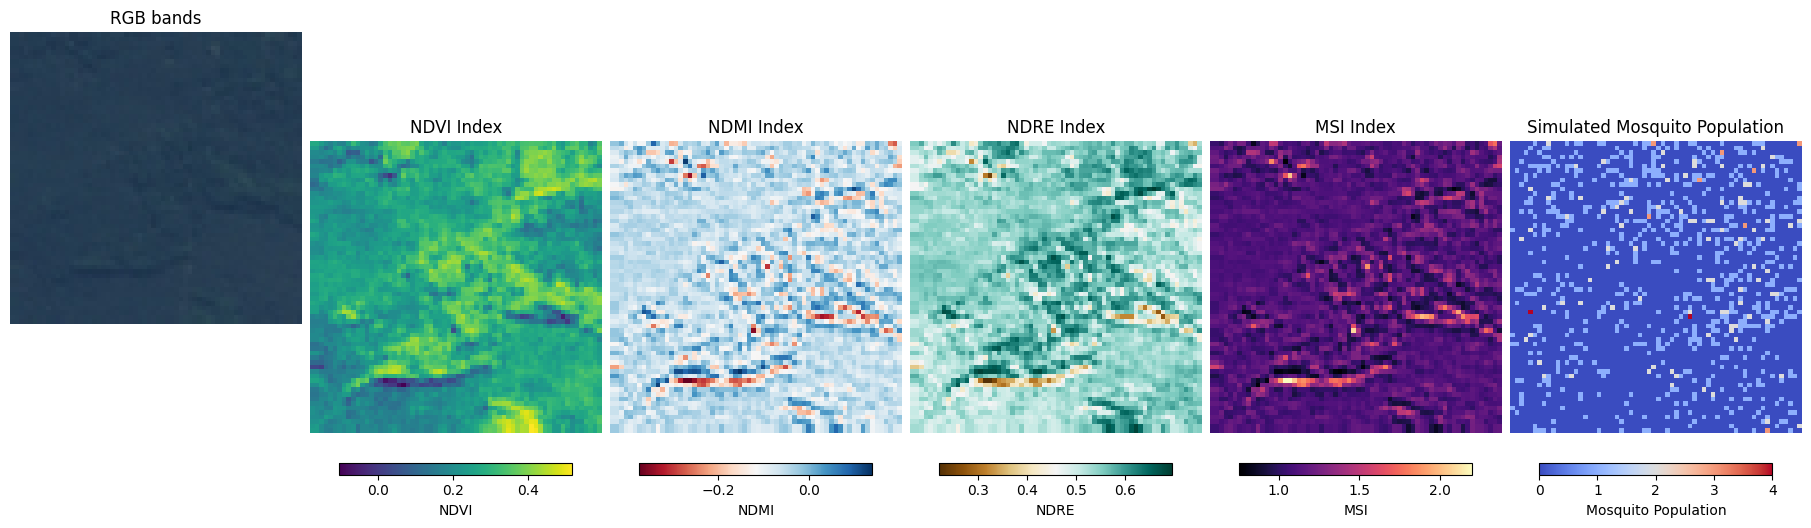

In [16]:
f_img_path = simulated_meta[i]['cf_img_path']
ndvi = simulated_meta[i]['cf_ndvi']
ndmi = simulated_meta[i]['cf_ndmi']
ndre = simulated_meta[i]['cf_ndre']
msi = simulated_meta[i]['cf_msi']
mosquito_pop = simulated_meta[i]['cf_mosquito_pop']

print(f_img_path)
with rasterio.open(f_img_path) as src:
    img = src.read()  # Read all bands
    profile = src.profile  # Metadata of the image


# Set up the figure with 6 subplots
fig, axes = plt.subplots(1, 6, figsize=(18, 6), constrained_layout=True)

# Function to add an image and horizontal colorbar below
def plot_with_colorbar(ax, data, cmap, title, label):
    im = ax.imshow(data, cmap=cmap, origin='lower')
    ax.set_title(title)
    ax.axis("off")
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.8, pad=0.05)  # Shrink keeps it aligned
    cbar.set_label(label)

# Plot RGB bands
axes[0].imshow(np.flipud(img[[0, 1, 2], :, :].transpose(1, 2, 0)))
axes[0].set_title("RGB bands")
axes[0].axis("off")  # No colorbar for RGB

# Plot indices with colorbars below
plot_with_colorbar(axes[1], ndvi, 'viridis', 'NDVI Index', 'NDVI')   # NDVI → Viridis
plot_with_colorbar(axes[2], ndmi, 'RdBu', 'NDMI Index', 'NDMI')      # NDMI → Red to Blue
plot_with_colorbar(axes[3], ndre, 'BrBG', 'NDRE Index', 'NDRE')      # NDRE → Brown to Green
plot_with_colorbar(axes[4], msi, 'magma', 'MSI Index', 'MSI')        # MSI → Magma
plot_with_colorbar(axes[5], mosquito_pop, 'coolwarm', 'Simulated Mosquito Population', 'Mosquito Population')  # Population → Coolwarm

# Show the final plot
plt.show()


### save synthesized data

In [17]:
import pickle
with open('data/simulated_meta_EuroSAT.pkl', 'wb') as f:
    pickle.dump(simulated_meta, f)